In [1]:
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd

csv_encoding = "latin-1"  # Replace with the actual encoding of your file

df = pd.read_csv("laptop_price_data.csv", encoding=csv_encoding)

In [3]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


## Transform the price column to dollars

In [4]:
exchange_rate = 0.012  # 19/05/2023

# Convert the 'price_inr' column to USD
df['Price'] = df['Price'] * exchange_rate

In [5]:
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,415.788,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,467.988,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,479.988,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,839.880,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,323.880,3 stars,0,0


## Data Shape

In [6]:
df.shape

(823, 19)

## Data Information

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand              823 non-null    object 
 1   processor_brand    823 non-null    object 
 2   processor_name     823 non-null    object 
 3   processor_gnrtn    823 non-null    object 
 4   ram_gb             823 non-null    object 
 5   ram_type           823 non-null    object 
 6   ssd                823 non-null    object 
 7   hdd                823 non-null    object 
 8   os                 823 non-null    object 
 9   os_bit             823 non-null    object 
 10  graphic_card_gb    823 non-null    object 
 11  weight             823 non-null    object 
 12  warranty           823 non-null    object 
 13  Touchscreen        823 non-null    object 
 14  msoffice           823 non-null    object 
 15  Price              823 non-null    float64
 16  rating             823 non

## Data description

In [8]:
df.describe()

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,920.942129,315.301337,37.609964
std,541.221486,1047.382654,121.728017
min,203.880000,0.000000,0.000000
25%,553.140000,0.000000,0.000000
50%,779.880000,17.000000,2.000000
75%,1075.632000,139.500000,18.000000
max,5303.880000,15279.000000,1947.000000


## Droping duplicates

In [12]:
df.duplicated().sum()

21

In [13]:
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
duplicate_rows

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
13,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,275.880,3 stars,0,0
45,ASUS,Intel,Core i3,11th,8 GB,DDR4,256 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,551.880,4 stars,816,147
125,ASUS,Intel,Core i3,10th,4 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,491.880,4 stars,4008,519
182,DELL,Intel,Core i3,11th,4 GB,DDR4,256 GB,1024 GB,Windows,64-bit,0 GB,ThinNlight,1 year,No,Yes,523.080,3 stars,0,0
265,ASUS,Intel,Core i5,11th,16 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,719.880,3 stars,0,0
352,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,1019.880,3 stars,0,0
375,ASUS,Intel,Core i5,11th,8 GB,LPDDR4X,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,Yes,No,1199.880,3 stars,0,0
391,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,786.672,3 stars,0,0
393,Avita,Intel,Core i5,7th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,786.672,3 stars,0,0
399,Avita,Intel,Core i5,8th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,ThinNlight,No warranty,No,No,876.756,3 stars,17,3


In [14]:
df = df.drop_duplicates()
df.shape

(802, 19)

## util functions

In [15]:
import matplotlib.pyplot as plt

def draw_hist_dist(column_name):
    counts = df[column_name].value_counts()

    plt.bar(counts.index, counts.values)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'{column_name} Distribution')
    for i, count in enumerate(counts.values):
        plt.text(i, count, str(count), ha='center', va='bottom')

    plt.show()

## Columns analysis

#### Brand column
* There are 9 brands : ['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE']
* There are more ASUS laptop in this dataset

In [16]:
df['brand'].unique()

array(['ASUS', 'Lenovo', 'acer', 'Avita', 'HP', 'DELL', 'MSI', 'APPLE'],
      dtype=object)

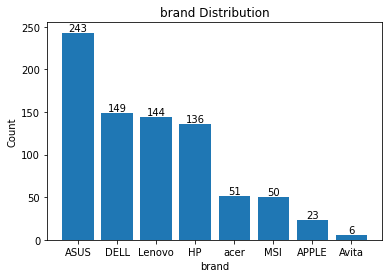

In [17]:
draw_hist_dist("brand")

#### Processor_brand column
* There are 3 processor brand : Intel, AMD, M1
* There are a lot of intel laptops in this dataset

In [18]:
df['processor_brand'].unique()

array(['Intel', 'AMD', 'M1'], dtype=object)

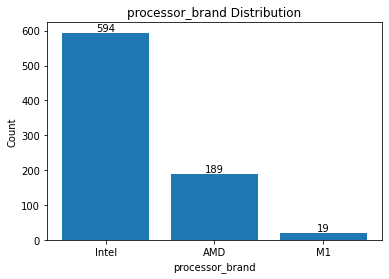

In [19]:
draw_hist_dist("processor_brand")

### Loop over all columns that are not numerical

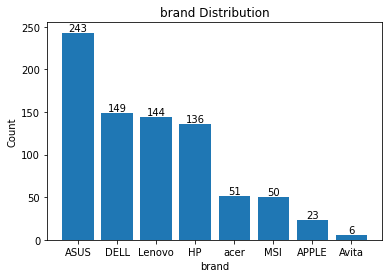

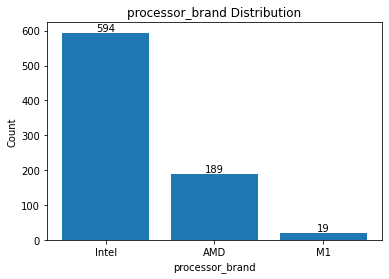

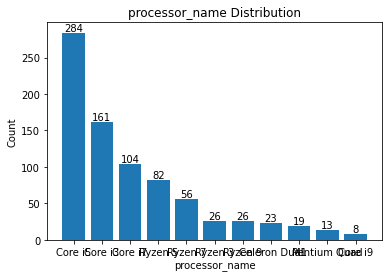

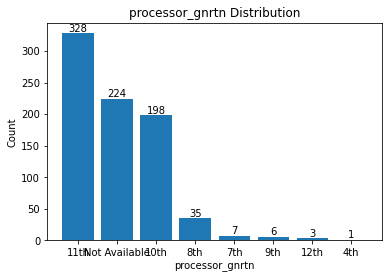

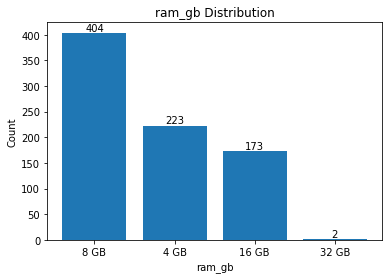

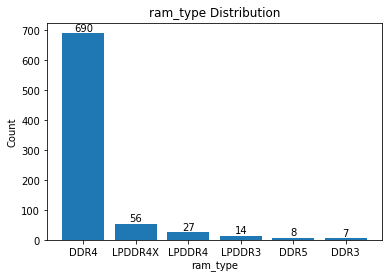

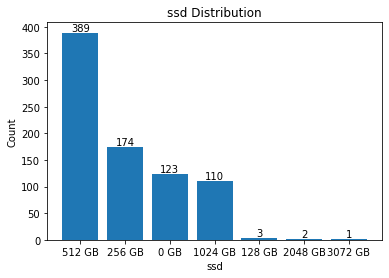

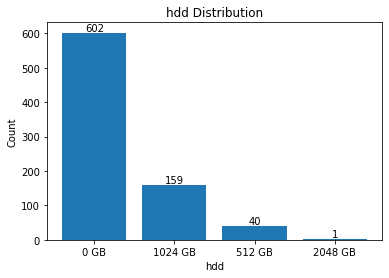

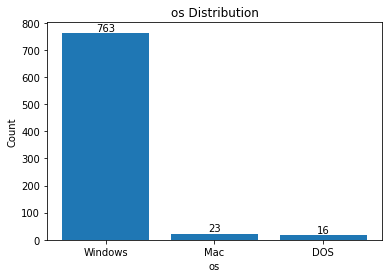

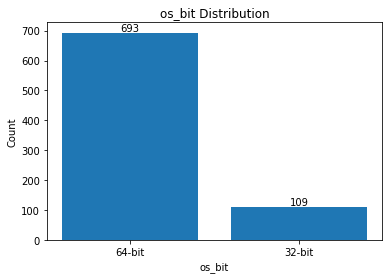

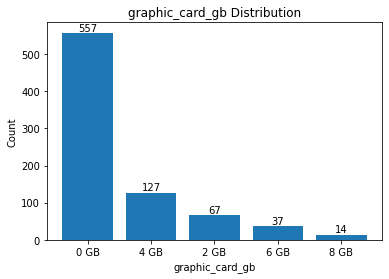

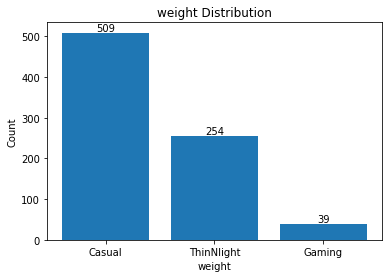

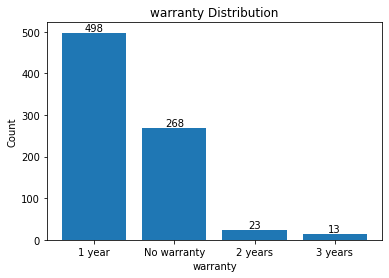

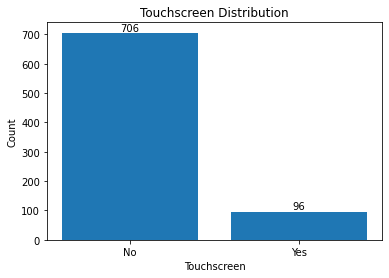

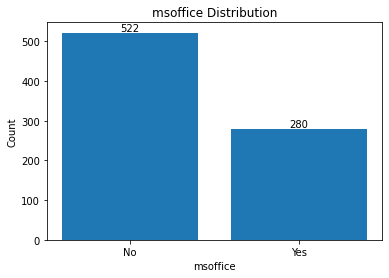

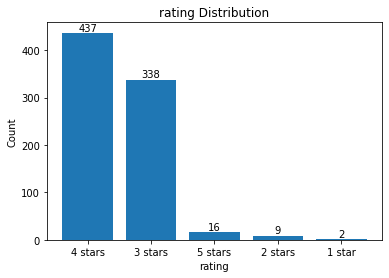

In [20]:
for c in df.columns:
    if df[c].dtype == "O":
        draw_hist_dist(c)

#### Processor brand with their names

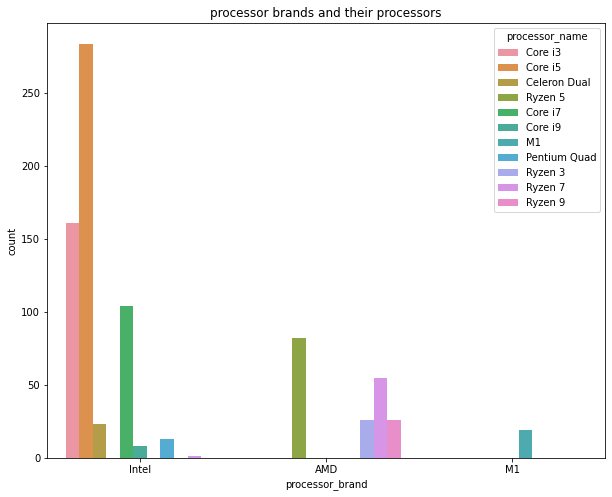

In [21]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='processor_brand', hue='processor_name')
plt.title('processor brands and their processors')
plt.show()

## Laptop price with respect to some columns

In [22]:
df.groupby('brand')['Price'].mean().reset_index().Price.values

array([1884.97565217,  953.11224691,  676.158     ,  729.46743624,
        883.68326471,  875.0425    , 1184.55624   ,  869.04047059])

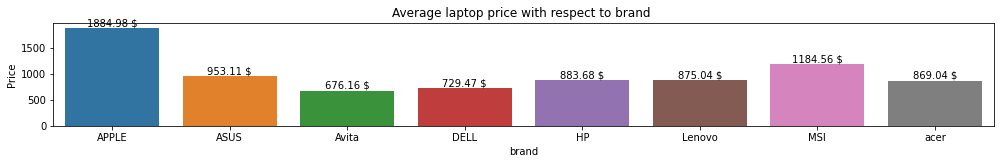

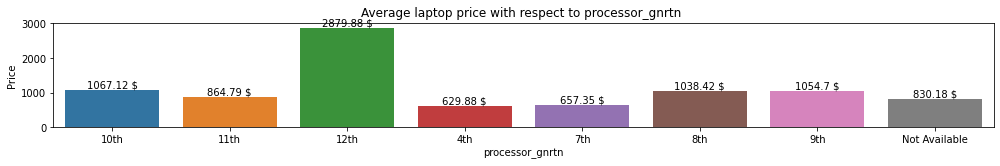

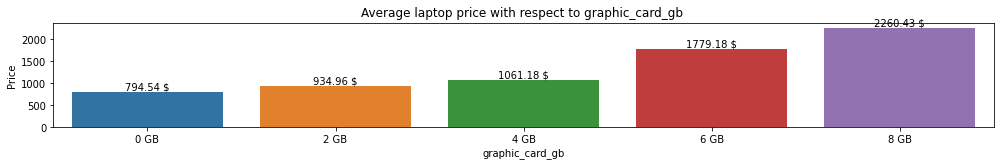

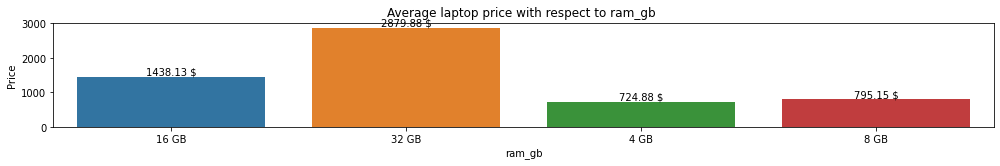

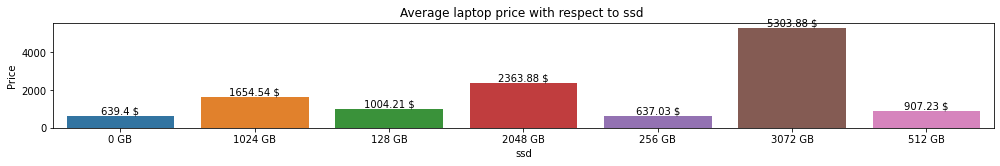

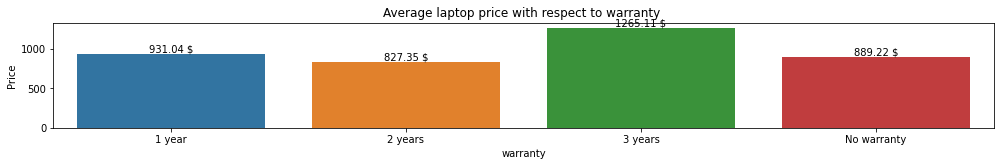

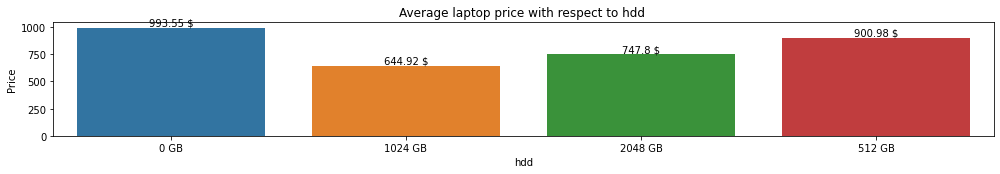

In [23]:
cols = ['brand', 'processor_gnrtn', 'graphic_card_gb', 'ram_gb', 'ssd', 'warranty', 'hdd']
for count, col in enumerate(cols):
    plt.figure(figsize=(14, 14))
    plt.subplot(len(cols), 1, count + 1)
    tmp_df = df.groupby(col)['Price'].mean().reset_index()
    sns.barplot(data=tmp_df, x=col, y='Price')
    plt.title(f'Average laptop price with respect to {col} ')
    plt.tight_layout()
    for i, price in enumerate(tmp_df['Price'].values):
        plt.text(i, price, str(round(price, 2))+ ' $', ha='center', va='bottom')
plt.show()

## Checking the number of unique values of each column

In [24]:
df.nunique()

brand                  8
processor_brand        3
processor_name        11
processor_gnrtn        8
ram_gb                 4
ram_type               6
ssd                    7
hdd                    4
os                     3
os_bit                 2
graphic_card_gb        5
weight                 3
warranty               4
Touchscreen            2
msoffice               2
Price                405
rating                 5
Number of Ratings    282
Number of Reviews    135
dtype: int64

## Numerical and categorical variables

In [28]:
numerical_features = df.select_dtypes(exclude="object").columns
cat_features = df.select_dtypes(include="object").columns

In [34]:
print(numerical_features.values)
print(cat_features.values)

['Price' 'Number of Ratings' 'Number of Reviews']
['brand' 'processor_brand' 'processor_name' 'processor_gnrtn' 'ram_gb'
 'ram_type' 'ssd' 'hdd' 'os' 'os_bit' 'graphic_card_gb' 'weight'
 'warranty' 'Touchscreen' 'msoffice' 'rating']


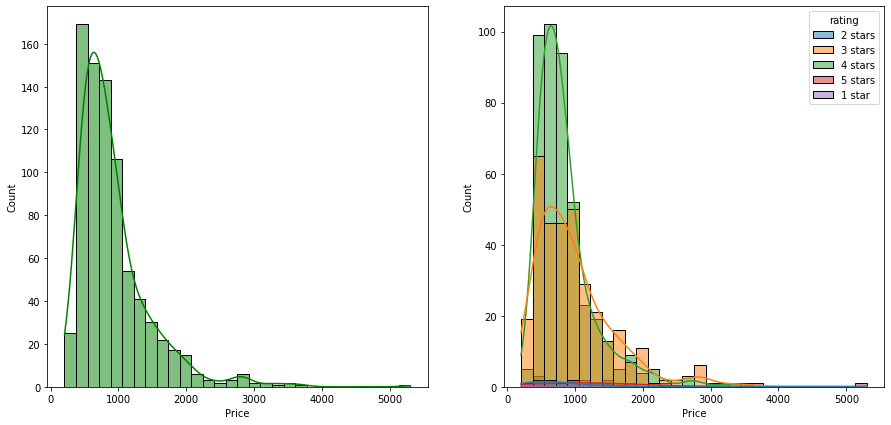

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x= 'Price', bins=30, kde=True, color='g', hue= 'rating')
plt.show()

## Removing some columns
Because I want to make a web app and user should enter some data so the model can predict the price of the laptop, I will be removing Number of rating and number of reviews columns

In [39]:
df = df.drop(['Number of Ratings', 'Number of Reviews'], axis=1)
df.shape

(802, 17)

## Outlier handling

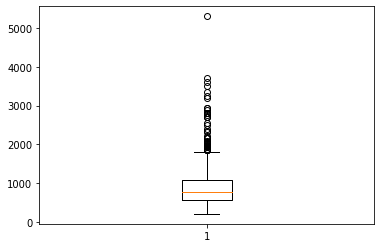

In [41]:
plt.boxplot(df['Price'])
plt.show()

Price contains a lot of outliers, but i think that is due to the fact that there are few high price laptop. However, I will not remove them so that the model will not be performing only on average price laptops